### Домашнее задание "Работа с переменными"

#### Задание.
Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.
Данные вы сможете получить исполнив следующий код:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)
Переменная, которую надо предсказать - ’MEDV’.
Прочитать информацию о содержимом датасета:
print(load_boston()[‘DESCR’])
Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [55]:
from sklearn.datasets import load_boston
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [56]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Определим размер датасета

In [57]:
data.shape

(506, 14)

1. Посмотрим, есть ли пропущенные значения - Пропущенных значений нет.

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [59]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


В датасете все данные - числовые. Можно построить линейную регрессию и посмотреть какое качество можно получить на необработанном датасете. Используем функцию get_score.

In [60]:
X = data.loc[:, data.columns !='MEDV']
y = data['MEDV']

In [61]:
def get_score(X,y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
        model.fit(X_train, y_train)
        return model.score(X_test, y_test)

In [62]:
get_score(X,y)

0.711226005748494

2. Чтобы исключить влияние различной размерности выполним стандартизацию

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc = StandardScaler()

In [65]:
X_transform = sc.fit_transform(X)

In [66]:
sc_X = pd.DataFrame(X_transform, index = X.index, columns = X.columns)

In [67]:
sc_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [68]:
get_score(sc_X,y)

0.7112260057484925

Результат: Стандартизация не повлияла на метрики.

3. Посмотрим на характеристики признаков в датасете. Вызывают вопросы максимальные значения CRIM, ZN, у которых большой отрыв от 75 перцентиля. Возможно, это особенности районов, а не ошибка в данных. Но, попоробуем исключить выбросы и посмотреть как это повлияет на качество.  

In [69]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


c:\users\orlov\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRIM'>

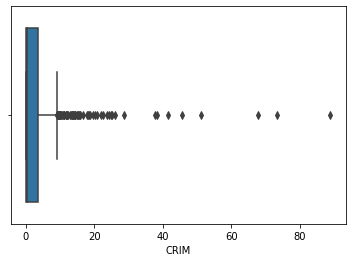

In [70]:
sns.boxplot(data['CRIM'])

In [71]:
data.loc[data['CRIM'] > 35]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
427,37.6619,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9


Исключим 'CRIM' > 35

In [72]:
data_out = data[data['CRIM'] < 35]

c:\users\orlov\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ZN'>

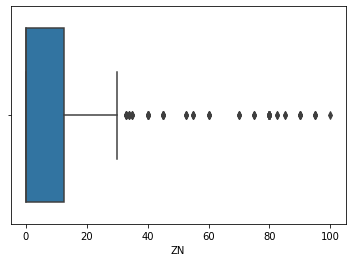

In [73]:
sns.boxplot(data['ZN'])

In [74]:
data.loc[data['ZN']>75]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
56,0.02055,85.0,0.74,0,0.4100,6.383,35.7,9.1876,2,313,17.3,396.90,5.77,24.7
57,0.01432,100.0,1.32,0,0.4110,6.816,40.5,8.3248,5,256,15.1,392.90,3.95,31.6
65,0.03584,80.0,3.37,0,0.3980,6.290,17.8,6.6115,4,337,16.1,396.90,4.67,23.5
66,0.04379,80.0,3.37,0,0.3980,5.787,31.1,6.6115,4,337,16.1,396.90,10.24,19.4
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
196,0.04011,80.0,1.52,0,0.4040,7.287,34.1,7.3090,2,329,12.6,396.90,4.08,33.3
197,0.04666,80.0,1.52,0,0.4040,7.107,36.6,7.3090,2,329,12.6,354.31,8.61,30.3
198,0.03768,80.0,1.52,0,0.4040,7.274,38.3,7.3090,2,329,12.6,392.20,6.62,34.6
199,0.03150,95.0,1.47,0,0.4030,6.975,15.3,7.6534,3,402,17.0,396.90,4.56,34.9


Больше похоже, что высокие значения переменной 'ZN' - это особенности районов. Не будем удалять эти значения.

In [75]:
X_out = data_out.loc[:, data_out.columns !='MEDV']
y_out = data_out['MEDV']
get_score(X_out,y_out)

0.7159049490405724

Результат: Удаление данных ухудшило метрику.

4. Построим матрицу корреляций

<AxesSubplot:>

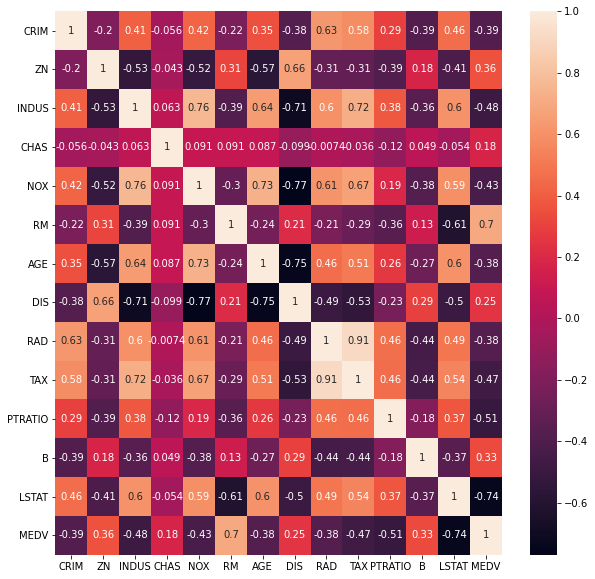

In [76]:
corr = data.corr()
plt.rcParams['figure.figsize']=10,10
sns.heatmap(corr,annot=True)

Eсть переменные, у которых довольно большая положительная корреляция (TAX и RAD - 0.91).  
Попробуем исключить переменную RAD.

In [77]:
X_corr = data.loc[:, ~data.columns.isin(['MEDV','RAD'])]

In [78]:
get_score(X_corr,y)

0.6883010754490857

Результат: Удаление данных ухудшило метрику.

5. Переменная RAD - индекс доступности скоростных автодорог, является категориальной. Преобразуем ее при помощи метода One Hot Encoding (функция get_one_hot)

In [85]:
data['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

In [88]:
def get_one_hot(X, cols):
    for each in cols:
        dummies = pd.get_dummies(X[each], prefix=each, drop_first=False)
        X = pd.concat([X, dummies], axis=1)
    return X

In [89]:
data_hot = get_one_hot(data, ['RAD'])
data_hot.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,36.2,0,0,1,0,0,0,0,0,0


In [98]:
X_hot = data_hot.loc[:, ~data_hot.columns.isin(['MEDV','RAD'])]
X_hot.shape

(506, 21)

In [91]:
get_score(X_hot,y)

0.7146830631847045

Результат: Использование One Hot Encoding слегка улучшило метрику, на 0.0034.

6. Попробуем построить полиномиальную регрессию 

In [99]:
from sklearn.preprocessing import PolynomialFeatures

In [109]:
poly_feat = PolynomialFeatures(degree = 2)

In [110]:
X_poly = poly_feat.fit_transform(X_hot)

In [111]:
X_poly.shape

(506, 253)

In [112]:
get_score(X_poly,y)

0.6745103167330653

Результат: Использование полиномиальной регрессии ухудшило метрику.